In [1]:
import numpy as np
import ROOT
from math import exp as expo
from math import cos as cosine
exp=np.vectorize(expo)
cos=np.vectorize(cosine)
import matplotlib.pylab as plt
from matplotlib.pyplot import figure
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
import scipy.optimize as opt


Welcome to JupyROOT 6.24/06


In [2]:
rand_dataset=[1,2,3,4,5,6,7,8,9,10,11,12,13]

In [3]:
rand_R=[ -36.698514, -36.834831, -35.177533, -34.258278, -34.784201, -32.729071, -36.606397, -36.606398, -36.327551, -37.264421, -35.242243, -34.264745, -32.473897]

In [4]:
rand_dR=[ 1.3821584, 2.4196299, 0.86775682, 1.3708257, 2.0455284, 1.2868438, 1.0142987, 1.0142980, 1.9470219, 2.3366940, 1.2529279, 0.90695426, 1.0606679]

In [5]:
copy_dataset=[1.1,2.1,3.1,4.1,5.1,6.1,7.1,8.1,9.1,10.1,11.1,12.1,13.1]

In [6]:
copy_R= [-36.80044628, -34.90278362, -35.79899593, -34.56143981, -35.35780074, -33.17655805, -36.28951876, -36.04653166, -34.76312191, -35.26690691, -35.25064362, -34.60066678, -32.69903561]

In [7]:
copy_dR=[1.12819475, 1.96305299, 0.78676956, 1.21705084, 1.69471997, 1.10801203, 1.15692326, 1.30868742, 1.74104879, 2.01821405, 1.06637582, 0.84804461, 0.93948371]

In [8]:
regularQ_dataset=[1.2,2.2,3.2,4.2,5.2,6.2,7.2,8.2,9.2,10.2,11.2,12.2,13.2]

In [9]:
regularQ_R=[-36.9532,-35.6876,-35.9127,-34.6729,-35.5002,-33.1129,-36.3899,-36.2701,-34.8781,-35.8336,-35.3045,-34.6595,-32.887]

In [10]:
regularQ_dR=[1.00197,1.77028,0.691679,1.05617,1.50085,0.972016,0.988472,1.19843,1.45883,1.77457,0.896068,0.708386,0.786607]

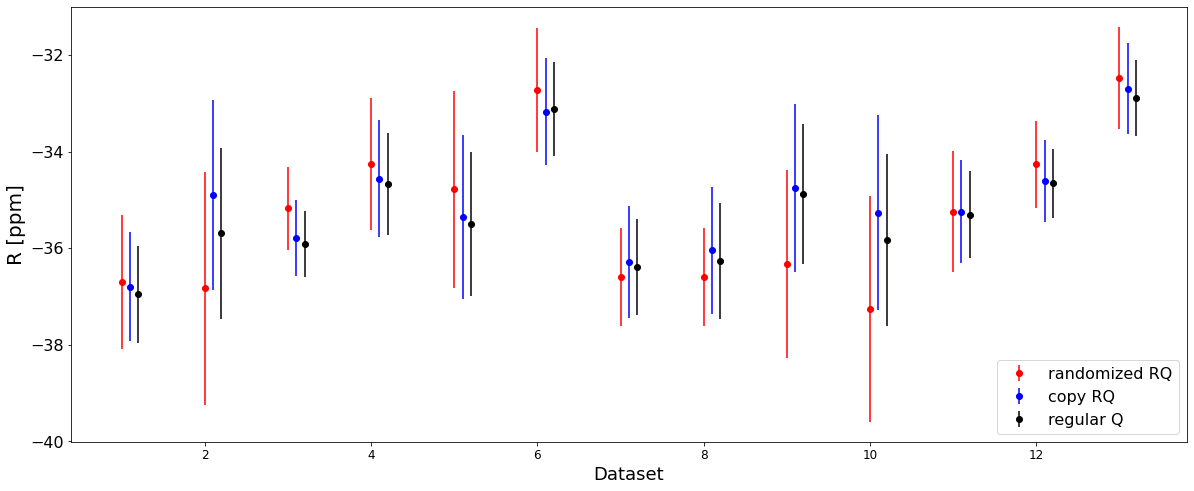

In [11]:
plt.figure(figsize=(20,8))
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(rand_dataset, rand_R, yerr=rand_dR, fmt="o",color="red",label="randomized RQ")
plt.errorbar(copy_dataset, copy_R, yerr=copy_dR, fmt="o",color="blue",label="copy RQ")
#plt.plot(copy_dataset, func_straight(copy_dataset), linestyle='solid', linewidth=1, color='blue')
plt.errorbar(regularQ_dataset, regularQ_R, yerr=regularQ_dR, fmt="o",color="black",label="regular Q")
plt.xlabel('Dataset',fontsize=18)
plt.ylabel('R [ppm]',fontsize=20)
#plt.ylim([0.9,1.15])
#plt.xlim([100000,150000])
plt.legend(loc=4, prop={'size': 16})
plt.show()

In [12]:
my_weights_BtoM=[0.14034936, 0.038128205, 0.21477943, 0.086410529, 0.043644328, 0.098697008, 0.095796173, 0.074301203, 0.046584419, 0.033399398, 0.12790995]

In [13]:
copy_sum=0.0
copy_sum_BtoM=0.0
copy_sum_NO=0.0
rand_sum=0.0
rand_sum_BtoM=0.0
rand_sum_NO=0.0

In [14]:
for i in range (0,11):
    copy_sum_BtoM=copy_sum_BtoM+copy_R[i]*my_weights_BtoM[i]

In [15]:
copy_sum_BtoM

-35.44957332093325

In [16]:
copy_R_BtoM= [-36.80044628, -34.90278362, -35.79899593, -34.56143981, -35.35780074, -33.17655805, -36.28951876, -36.04653166, -34.76312191, -35.26690691, -35.25064362,copy_sum_BtoM,-35.396]

In [17]:
copy_dataset_BtoM=[1,2,3,4,5,6,7,8,9,10,11,12,13]

In [18]:
copy_dR_BtoM=[1.12819475, 1.96305299, 0.78676956, 1.21705084, 1.69471997, 1.10801203, 1.15692326, 1.30868742, 1.74104879, 2.01821405, 1.06637582,0.399,0.399]

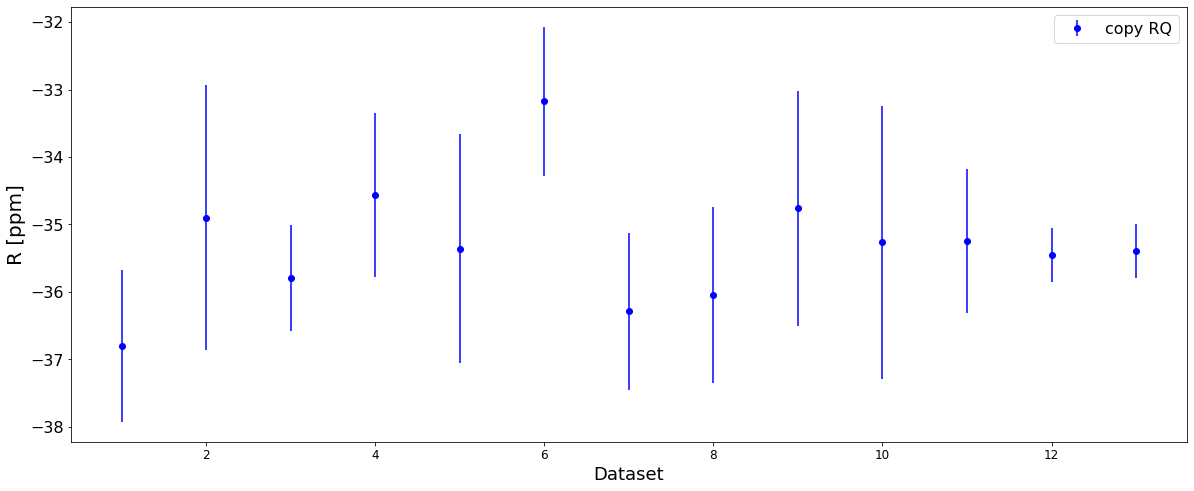

In [19]:
plt.figure(figsize=(20,8))
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(copy_dataset_BtoM, copy_R_BtoM, yerr=copy_dR_BtoM, fmt="o",color="blue",label="copy RQ")
plt.xlabel('Dataset',fontsize=18)
plt.ylabel('R [ppm]',fontsize=20)
#plt.ylim([0.9,1.15])
#plt.xlim([100000,150000])
plt.legend(loc=1, prop={'size': 16})
plt.show()

In [20]:
regularQ_sum=0.0
regularQ_sum_BtoM=0.0
regularQ_sum_NO=0.0

In [21]:
for i in range (0,11):
    regularQ_sum_BtoM=regularQ_sum_BtoM+regularQ_R[i]*my_weights_BtoM[i]

In [22]:
regularQ_sum_BtoM

-35.5923202355586

In [23]:
regularQ_R_BtoM= [-36.9532,-35.6876,-35.9127,-34.6729,-35.5002,-33.1129,-36.3899,-36.2701,-34.8781,-35.8336,-35.3045,regularQ_sum_BtoM,-35.501942]

In [24]:
regularQ_dataset_BtoM=[1,2,3,4,5,6,7,8,9,10,11,12,13]

In [25]:
regularQ_dR_BtoM=[1.00197,1.77028,0.691679,1.05617,1.50085,0.972016,0.988472,1.19843,1.45883,1.77457,0.896068,0.343608,0.343608]

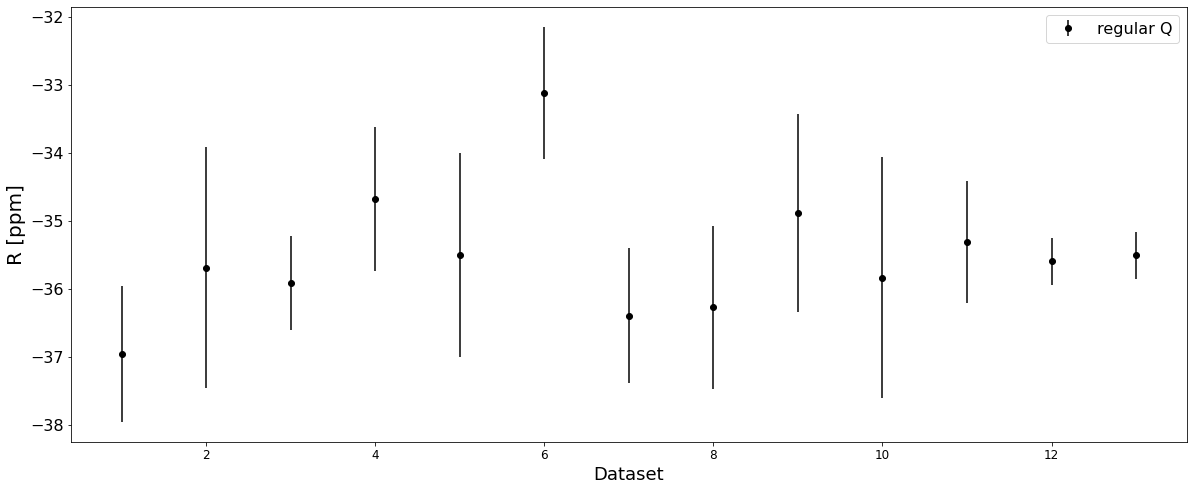

In [26]:
plt.figure(figsize=(20,8))
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(regularQ_dataset_BtoM, regularQ_R_BtoM, yerr=regularQ_dR_BtoM, fmt="o",color="black",label="regular Q")
plt.xlabel('Dataset',fontsize=18)
plt.ylabel('R [ppm]',fontsize=20)
#plt.ylim([0.9,1.15])
#plt.xlim([100000,150000])
plt.legend(loc=1, prop={'size': 16})
plt.show()

In [27]:
tim_weights_BtoM=[0.13345042, 0.038822876, 0.21814769, 0.087072886, 0.043940041, 0.099428747, 0.17088930, 0.046820376, 0.033655928, 0.12777174]

In [28]:
rand_R_new=[ -36.698514, -36.834831, -35.177533, -34.258278, -34.784201, -32.729071, -36.606397, -36.327551, -37.264421, -35.242243]

In [29]:
for i in range (0,10):
    rand_sum_BtoM=rand_sum_BtoM+rand_R_new[i]*tim_weights_BtoM[i]

In [30]:
rand_sum_BtoM

-35.48060315544698

In [35]:
rand_R_BtoM= [ -36.698514, -36.834831, -35.177533, -34.258278, -34.784201, -32.729071, -36.606397, -36.327551, -37.264421, -35.242243, rand_sum_BtoM,-35.4084]

In [36]:
rand_dR_BtoM = [ 1.3821584, 2.4196299, 0.86775682, 1.3708257, 2.0455284, 1.2868438, 1.0142980, 1.9470219, 2.3366940, 1.2529279, 0.434992, 0.434992]

In [37]:
rand_dataset_BtoM=[1,2,3,4,5,6,7,8,9,10,11,12]

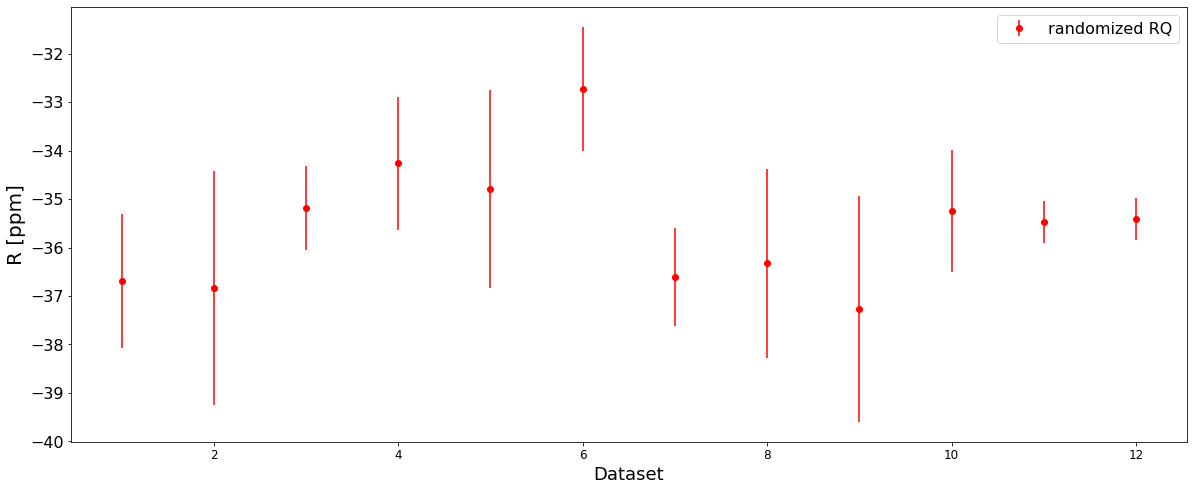

In [38]:
plt.figure(figsize=(20,8))
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(rand_dataset_BtoM, rand_R_BtoM, yerr=rand_dR_BtoM, fmt="o",color="red",label="randomized RQ")
plt.xlabel('Dataset',fontsize=18)
plt.ylabel('R [ppm]',fontsize=20)
#plt.ylim([0.9,1.15])
#plt.xlim([100000,150000])
plt.legend(loc=1, prop={'size': 16})
plt.show()

In [39]:
R_rand_diff=np.empty(len(rand_dataset))
dR_rand_diff=np.empty(len(rand_dataset))
for i in range(0,len(rand_dataset)):
    R_rand_diff[i]=rand_R[i]-regularQ_R[i]
    dR_rand_diff[i]=np.sqrt( (rand_dR[i]*rand_dR[i]) + (regularQ_dR[i]*regularQ_dR[i]) )

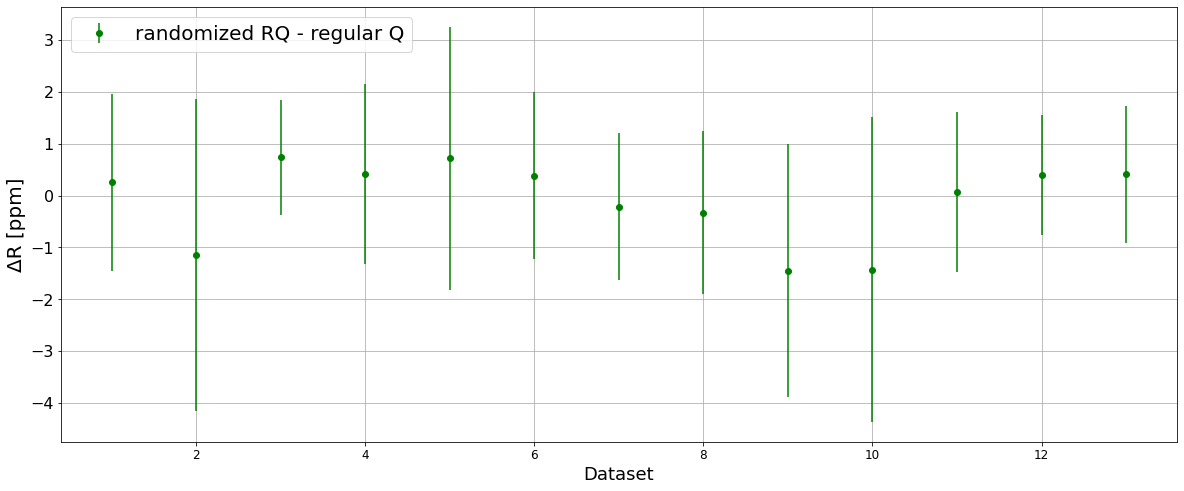

In [40]:
plt.figure(figsize=(20,8))
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(rand_dataset, R_rand_diff, yerr=dR_rand_diff, fmt="o",color="green",label="randomized RQ - regular Q")
plt.xlabel('Dataset',fontsize=18)
plt.ylabel('ΔR [ppm]',fontsize=20)
#plt.ylim([-48,-35])
#plt.xlim([100000,150000])
plt.legend(loc=2, prop={'size': 20})
plt.grid()
plt.show()

In [41]:
R_copy_diff=np.empty(len(copy_dataset))
dR_copy_diff=np.empty(len(copy_dataset))
for i in range(0,len(copy_dataset)):
    R_copy_diff[i]=copy_R[i]-regularQ_R[i]
    dR_copy_diff[i]=np.sqrt( (copy_dR[i]*copy_dR[i]) + (regularQ_dR[i]*regularQ_dR[i]) )

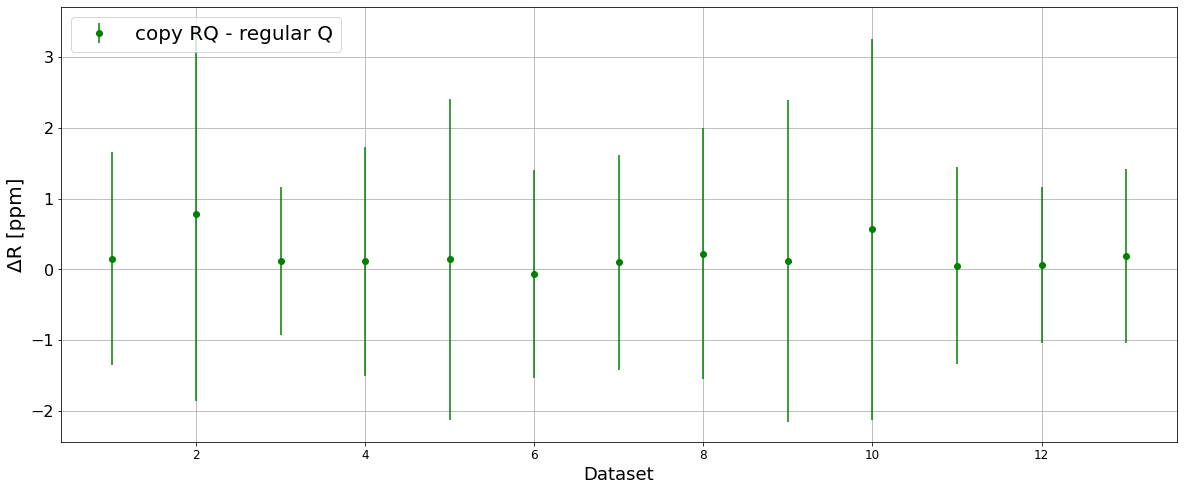

In [42]:
plt.figure(figsize=(20,8))
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(rand_dataset, R_copy_diff, yerr=dR_copy_diff, fmt="o",color="green",label="copy RQ - regular Q")
plt.xlabel('Dataset',fontsize=18)
plt.ylabel('ΔR [ppm]',fontsize=20)
#plt.ylim([-48,-35])
#plt.xlim([100000,150000])
plt.legend(loc=2, prop={'size': 20})
plt.grid()
plt.show()